<a href="https://colab.research.google.com/github/PraveenKumar-pk-star/GenAI_RAG/blob/main/Bytexl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
learning_df = pd.read_csv("/content/learning02-09-25_activity_csv.csv")
course_df = pd.read_csv("/content/course_daetails02-09-25_activity_csv.csv")
placement_df = pd.read_csv("/content/placement_data2-09-25_activity_csv.csv")
learning_df

,student_id,activity_date,course_id,time_spent,modules_completed,quizzes_attempted,quizzes_passed
0,1010,2025-01-31,C001,01:26:48.000000,5,2,0
1,1011,2025-01-31,C001,01:02:56.000000,4,1,0
2,1012,2025-01-31,C001,00:36:48.000000,3,2,1
3,1013,2025-01-31,C001,01:28:49.000000,2,1,0
4,1014,2025-01-31,C001,00:07:46.000000,1,3,0
...,...,...,...,...,...,...,...
7745,1055,2025-01-01,C005,00:37:41.000000,5,2,0
7746,1056,2025-01-01,C005,01:13:42.000000,4,2,0
7747,1057,2025-01-01,C005,00:31:55.000000,2,2,1
7748,1058,2025-01-01,C005,00:58:05.000000,4,3,1


In [2]:
print("Learning Activity Dataset:")
display(learning_df.head())

print("\nCourse Data Dataset:")
display(course_df.head())

print("\nPlacement Data Dataset:")
display(placement_df.head())

Learning Activity Dataset:


,student_id,activity_date,course_id,time_spent,modules_completed,quizzes_attempted,quizzes_passed
0,1010,2025-01-31,C001,01:26:48.000000,5,2,0
1,1011,2025-01-31,C001,01:02:56.000000,4,1,0
2,1012,2025-01-31,C001,00:36:48.000000,3,2,1
3,1013,2025-01-31,C001,01:28:49.000000,2,1,0
4,1014,2025-01-31,C001,00:07:46.000000,1,3,0



Course Data Dataset:


,course_id,course_name,category,difficulty_level,duration_weeks,instructor_id
0,C001,Data Science Basics,Data Science,Beginner,8,I101
1,C002,Machine Learning,AI & ML,Intermediate,12,I102
2,C003,Deep Learning,AI & ML,Advanced,10,I103
3,C004,SQL for Analysts,Databases,Beginner,6,I104
4,C005,Python Programming,Programming,Beginner,8,I105



Placement Data Dataset:


,student_id,program_completed,completion_date,placement_status,placement_date,company_name,salary
0,1050,Python Programming,2025-05-15,Placed,2025-05-09,Infosys,351246.0
1,1040,Deep Learning,2025-04-20,Placed,2025-05-12,Infosys,427207.0
2,1030,Data Science Basics,2025-04-11,Placed,2025-05-13,Microsoft,763468.0
3,1020,Data Science Basics,2025-05-01,Placed,2025-05-22,Infosys,576645.0
4,1010,Machine Learning,2025-04-18,Placed,2025-05-04,TCS,568429.0


In [3]:

# Handle Missing Values
print("Missing values:\n")
print(learning_df.isnull().sum())
print(course_df.isnull().sum())
print(placement_df.isnull().sum())


Missing values:

student_id           0
activity_date        0
course_id            0
time_spent           0
modules_completed    0
quizzes_attempted    0
quizzes_passed       0
dtype: int64
course_id           0
course_name         0
category            0
difficulty_level    0
duration_weeks      0
instructor_id       0
dtype: int64
student_id            0
program_completed     0
completion_date       0
placement_status      0
placement_date       50
company_name         50
salary               50
dtype: int64


In [4]:
learning_df['activity_date'] = pd.to_datetime(learning_df['activity_date'])
placement_df['completion_date'] = pd.to_datetime(placement_df['completion_date'])
placement_df['placement_date'] = pd.to_datetime(placement_df['placement_date'])

In [5]:

learning_df['quizzes_passed'] = learning_df['quizzes_passed'].fillna(0)

placement_df['company_name'] = placement_df['company_name'].fillna("XXXXXXX")

placement_df['salary'] = placement_df['salary'].fillna(0)
placement_df['placement_date'] = pd.to_datetime(
    placement_df["placement_date"], errors='coerce'
)

In [6]:
placement_df.isnull().sum()

,0
student_id,0
program_completed,0
completion_date,0
placement_status,0
placement_date,50
company_name,0
salary,0


In [7]:
placement_df.head()

,student_id,program_completed,completion_date,placement_status,placement_date,company_name,salary
0,1050,Python Programming,2025-05-15,Placed,2025-05-09,Infosys,351246.0
1,1040,Deep Learning,2025-04-20,Placed,2025-05-12,Infosys,427207.0
2,1030,Data Science Basics,2025-04-11,Placed,2025-05-13,Microsoft,763468.0
3,1020,Data Science Basics,2025-05-01,Placed,2025-05-22,Infosys,576645.0
4,1010,Machine Learning,2025-04-18,Placed,2025-05-04,TCS,568429.0


In [27]:


learning_df['time_spent'] = learning_df['time_spent'].apply(
    lambda x: x[0] if isinstance(x, list) else x
)
learning_df['time_spent'] = pd.to_timedelta(learning_df['time_spent'], errors='coerce')

learning_df['time_spent'] = learning_df['time_spent'].apply(
    lambda x: str(x).split(" days ")[-1].split('.')[0] if pd.notnull(x) else "00:00:00"
)

In [29]:

merged_df = learning_df.merge(course_df, on="course_id", how="left")


merged_df = merged_df.merge(placement_df, on="student_id", how="left")

print("Datasets merged successfully!")
display(merged_df.head())

merged_df.to_csv("merged_df.csv", index=False)
from google.colab import files
files.download("merged_df.csv")


✅ Datasets merged successfully!


,student_id,activity_date,course_id,time_spent,modules_completed,quizzes_attempted,quizzes_passed,week,course_name,category,difficulty_level,duration_weeks,instructor_id,program_completed,completion_date,placement_status,placement_date,company_name,salary
0,1010,2025-01-31,C001,01:26:48,5,2,0,5,Data Science Basics,Data Science,Beginner,8,I101,Machine Learning,2025-04-18,Placed,2025-05-04,TCS,568429.0
1,1010,2025-01-31,C001,01:26:48,5,2,0,5,Data Science Basics,Data Science,Beginner,8,I101,Python Programming,2025-04-12,Placed,2025-05-15,Infosys,782868.0
2,1010,2025-01-31,C001,01:26:48,5,2,0,5,Data Science Basics,Data Science,Beginner,8,I101,SQL for Analysts,2025-04-10,Placed,2025-05-13,TCS,507033.0
3,1010,2025-01-31,C001,01:26:48,5,2,0,5,Data Science Basics,Data Science,Beginner,8,I101,Python Programming,2025-05-16,Not Placed,NaT,XXXXXXX,0.0
4,1010,2025-01-31,C001,01:26:48,5,2,0,5,Data Science Basics,Data Science,Beginner,8,I101,Deep Learning,2025-04-03,Placed,2025-05-15,Amazon,628826.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

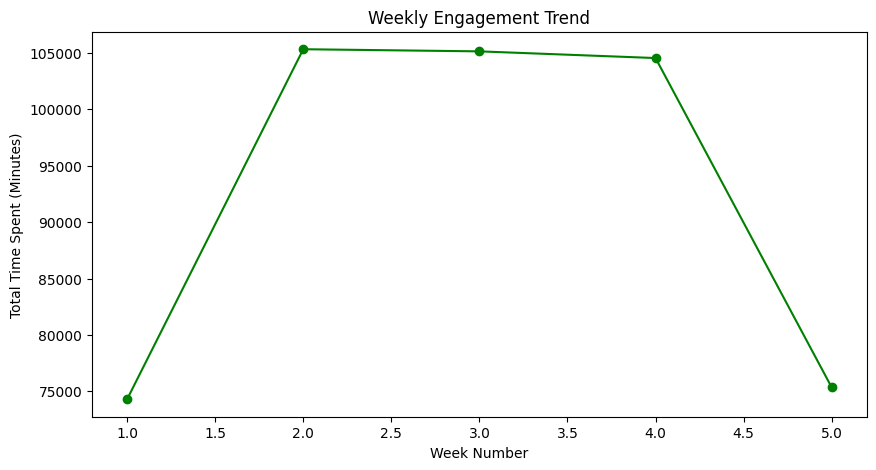

In [10]:
# Student Engagement Analysis
learning_df['activity_date'] = pd.to_datetime(learning_df['activity_date'])
learning_df['time_spent'] = pd.to_timedelta(learning_df['time_spent'])
learning_df['week'] = learning_df['activity_date'].dt.isocalendar().week
weekly_engagement = learning_df.groupby('week')['time_spent'].sum().dt.total_seconds() / 60

plt.figure(figsize=(10,5))
plt.plot(weekly_engagement, marker='o', color="green")
plt.title("Weekly Engagement Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Time Spent (Minutes)")
plt.show()

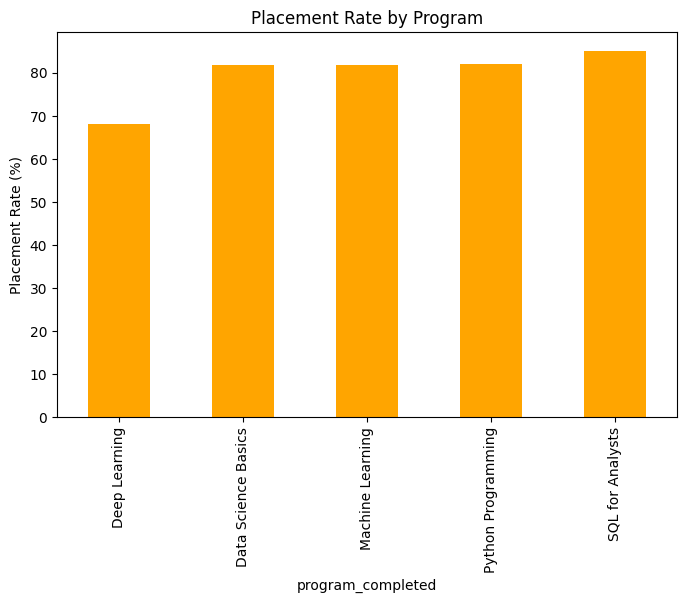

In [11]:
# Course Effectiveness Evaluation
completion_rate = placement_df.groupby('program_completed')['placement_status'].apply(
    lambda x: (x == "Placed").mean() * 100
)

plt.figure(figsize=(8,5))
completion_rate.sort_values().plot(kind='bar', color='orange')
plt.title("Placement Rate by Program")
plt.ylabel("Placement Rate (%)")
plt.show()


In [12]:
placement_rate = placement_df.groupby('program_completed')['placement_status'].apply(
    lambda x: (x == "Placed").mean() * 100
)
print("Placement Rate per Program:\n")
print(placement_rate)

Placement Rate per Program:

program_completed
Data Science Basics    81.818182
Deep Learning          68.085106
Machine Learning       81.818182
Python Programming     82.000000
SQL for Analysts       85.185185
Name: placement_status, dtype: float64


/tmp/ipython-input-197069186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")


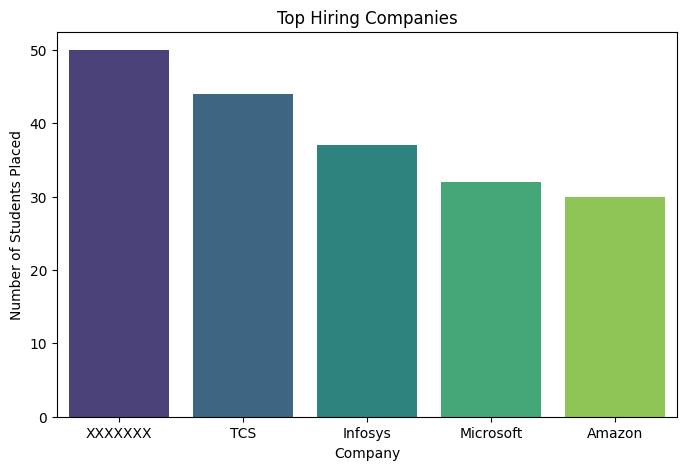

In [13]:
top_companies = placement_df['company_name'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
plt.title("Top Hiring Companies")
plt.ylabel("Number of Students Placed")
plt.xlabel("Company")
plt.show()


/tmp/ipython-input-2700686871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=placement_df, x='program_completed', y='salary', palette="coolwarm")


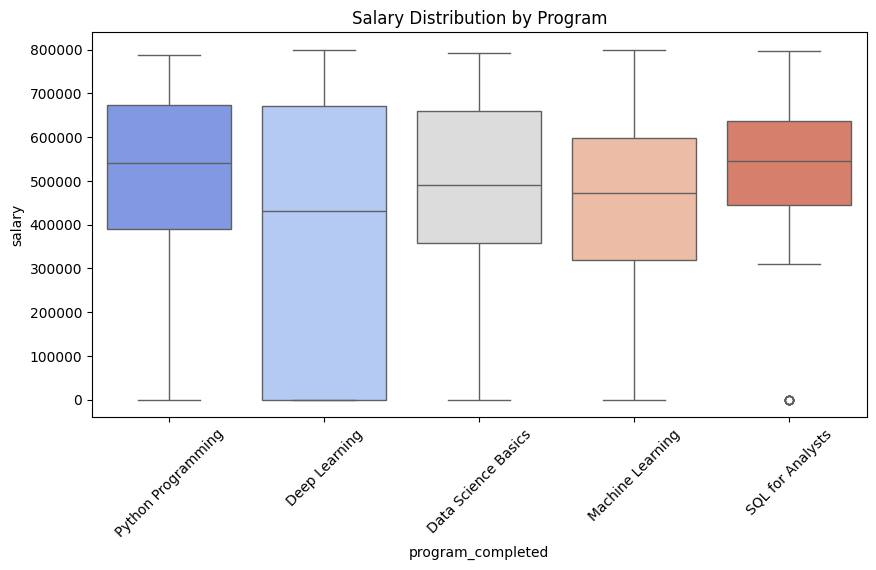

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=placement_df, x='program_completed', y='salary', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Program")
plt.show()

In [15]:
# Convert 'time_spent' to total seconds
merged_df['time_spent'] = merged_df['time_spent'].apply(lambda x: pd.to_timedelta(x).total_seconds())

# Prepare features & target
X = merged_df[['time_spent', 'modules_completed', 'quizzes_passed']].fillna(0)
y = merged_df['placement_status'].apply(lambda x: 1 if x == "Placed" else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build model
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Accuracy & Report
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 0.7987956989247312

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2339
           1       0.80      1.00      0.89      9286

    accuracy                           0.80     11625
   macro avg       0.40      0.50      0.44     11625
weighted avg       0.64      0.80      0.71     11625



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:

merged_df['time_spent'] = merged_df['time_spent'].apply(lambda x: pd.to_timedelta(x).total_seconds())

X = merged_df[['time_spent', 'modules_completed', 'quizzes_passed']].fillna(0)
y = merged_df['placement_status'].apply(lambda x: 1 if x == "Placed" else 0)

# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# ----------------------------
# Hyperparameter Tuning (Logistic Regression)
# ----------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("✅ Best Hyperparameters:", grid_search.best_params_)

# ----------------------------
# Train Best Model
# ----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# ----------------------------
# Model Evaluation
# ----------------------------
print("\n✅ Improved Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Data Shape: (27125, 3)
Testing Data Shape: (11625, 3)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
✅ Best Hyperparameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}

✅ Improved Model Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2325
           1       0.80      1.00      0.89      9300

    accuracy                           0.80     11625
   macro avg       0.40      0.50      0.44     11625
weighted avg       0.64      0.80      0.71     11625



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Convert 'time_spent' to total seconds
merged_df['time_spent'] = merged_df['time_spent'].apply(lambda x: pd.to_timedelta(x).total_seconds())

# Prepare features & target
X = merged_df[['time_spent', 'modules_completed', 'quizzes_passed']].fillna(0)
y = merged_df['placement_status'].apply(lambda x: 1 if x == "Placed" else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🌳 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

🌳 Random Forest Accuracy: 0.7775483870967742
